In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [20]:
X = df['Attendance'].values.reshape(-1,1)
Y = df['CapstoneScore'].values

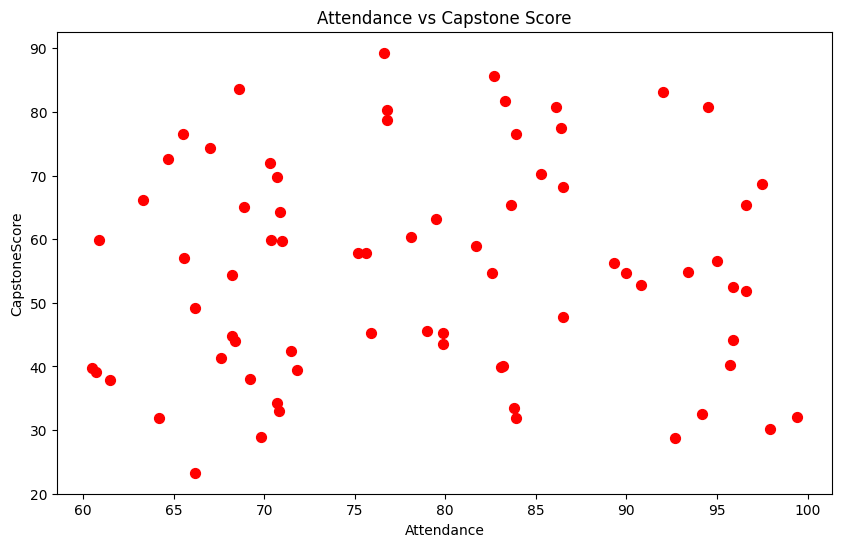

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color='red',s=50)
plt.xlabel('Attendance')
plt.ylabel('CapstoneScore')
plt.title('Attendance vs Capstone Score')
plt.show()

In [22]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

In [23]:
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)
    cost_history=[]

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


In [24]:
X_with_bias = np.column_stack([np.ones(len(X)),X])
beta = np.random.randn(2)
n_iter = 10000
lr = 0.0001

In [25]:
beta = gradient_descent(X_with_bias,Y,beta,n_iter,lr)

iteration: 0, beta:[-0.74908428 -0.36793268], cost:3755.2040969906598
iteration: 100, beta:[-0.72578581  0.69540169], cost:168.37842083750255
iteration: 200, beta:[-0.71571189  0.69527644], cost:168.36827088562484
iteration: 300, beta:[-0.70563995  0.69515121], cost:168.35812493607366
iteration: 400, beta:[-0.69557   0.695026], cost:168.34798298727074
iteration: 500, beta:[-0.68550204  0.69490082], cost:168.33784503763854
iteration: 600, beta:[-0.67543606  0.69477567], cost:168.32771108560016
iteration: 700, beta:[-0.66537206  0.69465054], cost:168.31758112957917
iteration: 800, beta:[-0.65531005  0.69452543], cost:168.3074551679999
iteration: 900, beta:[-0.64525002  0.69440035], cost:168.29733319928735
iteration: 1000, beta:[-0.63519198  0.69427529], cost:168.28721522186686
iteration: 1100, beta:[-0.62513592  0.69415026], cost:168.2771012341648
iteration: 1200, beta:[-0.61508184  0.69402525], cost:168.2669912346078
iteration: 1300, beta:[-0.60502975  0.69390027], cost:168.256885221623

In [26]:
x_min,x_max = float(np.min(X)), float(np.max(X))
x_intervel = np.linspace(x_min,x_max,100)
x_intervel_with_bias = np.column_stack([np.ones((len(x_intervel))), x_intervel])
y_hat_intervel = x_intervel_with_bias.dot(beta)


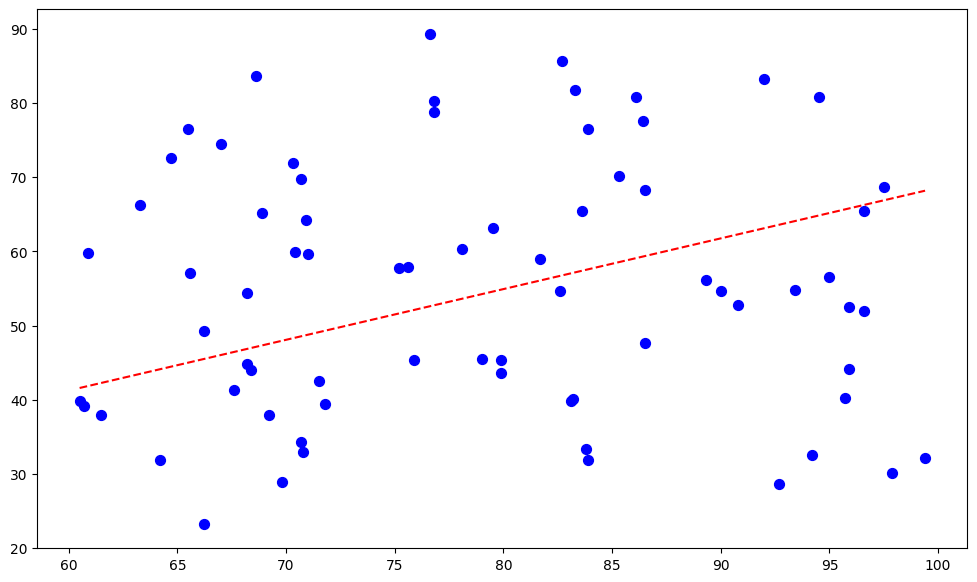

In [27]:
plt.figure(figsize=(12, 7))
plt.scatter(X, Y, color='blue', s=50)
plt.plot(x_intervel,y_hat_intervel,'r--', label="fitted line")
plt.show()

In [28]:
def Predict(X):
    X = np.array([1,X])
    y_predict = X.dot(beta)
    return y_predict

In [29]:
Predict(83.2)

np.float64(57.09759131722283)

#### Model Evaluation

In [30]:
Y_hat = X_with_bias.dot(beta) 
Y_hat

array([54.84328944, 52.72561191, 66.2514232 , 57.09759132, 59.3518932 ,
       52.58898756, 57.50746439, 61.74281943, 46.98738894, 65.77323795,
       46.85076459, 46.44089152, 42.27384865, 56.68771825, 53.61367023,
       45.48452102, 64.81686745, 48.62688122, 45.48452102, 59.28358102,
       47.32894983, 47.53388637, 44.11827746, 63.109063  , 59.07864449,
       64.61193092, 52.11080231, 46.85076459, 65.77323795, 41.59072687,
       57.1659035 , 65.63661359, 63.58724825, 48.35363251, 51.63261706,
       57.37084003, 48.55856904, 49.310003  , 67.13948151, 54.57004072,
       41.86397558, 48.55856904, 56.07290864, 58.53214706, 48.28532033,
       45.07464795, 64.06543349, 68.16416419, 48.6951934 , 41.72735122,
       44.45983835, 57.02927914, 48.76350558, 45.00633578, 65.15842834,
       57.57577656, 46.03101845, 66.2514232 , 52.72561191, 43.50346786,
       47.94375944, 51.90586577, 49.10506647, 56.75603043, 54.22847983,
       59.3518932 , 66.8662328 , 61.26463419, 47.1240133 , 54.84

In [31]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

In [32]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")

MSE : 334.7856866126635
MAE : 15.352928692151274
R2 Score : -0.17169030153696974


In [33]:
lr_model = LinearRegression()
lr_model.fit(X_with_bias[:, 1:], Y)  # skip the intercept column since sklearn adds it internally

print("Sklearn coefficients:", lr_model.coef_)
print("Sklearn intercept:", lr_model.intercept_)

Sklearn coefficients: [0.06017068]
Sklearn intercept: 50.36437673487044


In [34]:
attendance_value = 83.2
prediction = lr_model.predict([[attendance_value]])
print(prediction)


[55.37057721]
